<a href="https://colab.research.google.com/github/alekseytanana/ml_notebooks/blob/main/Generate_Neural_Style_Image_3_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Install dependencies
from IPython.display import clear_output

!pip install h5py
!pip install typing-extensions
!pip install wheel

%tensorflow_version 1.x

# !pip install ml4a
!pip install git+https://github.com/alekseytanana/ml4a.git@debug
clear_output()

**size**: size of canvas (default 512). Either as tuple (h, w) or maximum dimension.

**style_scale**: At what scale resolution to extract style features fr om style images (deault 1.0)

**input_image**: Start canvas from another image, rather than from random.

**num_iterations**: How many steps for the optimization (default 1000)

**normalize_gradients**: Normalize gradients for each update step

**original_colors**: Once done, transfer color distribution to that of the content image.

**content_weight, style_weight, tv_weight** modulate the magnitude of the three loss terms the optimizer is attempting to minimize: content reconstruction, style reconstruction, and total variation (TV). TV is a regularizer term which smooths the image by removing high-frequency noise.
The default values for content_weight, style_weight, and tv_weight are 
5.0, 100.0, and 0.001. The absolute magnitude of each of these is not important;
what is important is their relative amounts. By setting the ratio of 
content_weight/style_weight lower, the optimizer will optimize more towards 
style reconstruction. Higher prioritizes accurate content reconstruction.

Iteration 100/500: 
  Content loss = 8.7e+05
  Style loss = 1.4e+02, 9.7e+02, 5.7e+02, 5.3e+03, 1.3e+01
  Histogram loss = 
  TV loss = 1.6e+05
  Total loss = 1.04e+06


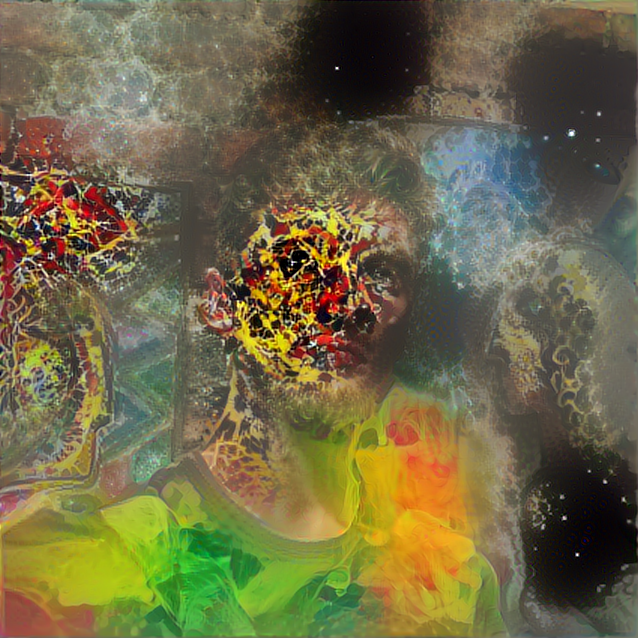

In [ ]:
# TODO: auto size detection

#@title # Generate Neural Style 🖼️ 3 layers (advanced)
%load_ext autoreload
%autoreload 2

from google.colab import files
from ml4a import image
from ml4a.models import basnet, neural_style
from ml4a.canvas import mask

neural_style.params.gpu = '0'
neural_style.params.backend = 'cudnn'

# @markdown ###**Main settings**
img_link = 'https://www.dropbox.com/s/jv0t8u6oe5ui4zn/IMG_6464.JPG?raw=1' #@param {type:"string"}
style_1_img = "https://www.dropbox.com/s/v8bzpdekz0ggov7/1.jpg?raw=1" #@param {type:"string"}
style_2_img = "https://www.dropbox.com/s/unts1g2wimaf5ot/2.jpg?raw=1" #@param {type:"string"}
style_3_img = "https://www.dropbox.com/s/tkqbsgqwic7t0ox/3.jpg?raw=1" #@param {type:"string"}

img = image.load_image(img_link)

output_img_size = "958" #@param ["360", "540", "720", "1024", "1600"] {allow-input: true}
output_img_size = int(output_img_size)
style_scale = 1.5 #@param {type:"slider", min:0.1, max:2, step:0.1}
original_colors = False #@param {type:"boolean"}

# @markdown ###**More settings**
num_iterations = "700 500 300" #@param {type:"string"}
num_octaves = 3 #@param {type:"integer"}
octave_ratio = 1.5 #@param {type:"slider", min:0, max:3, step:0.1}
content_weight = 5 #@param {type:"slider", min:0, max:100, step:1}
style_weight = 100.0 #@param {type:"slider", min:0, max:100, step:1}
tv_weight = 0.01 #@param {type:"slider", min:0, max:1, step:0.001}
masks_roughness = 50 #@param {type:"slider", min:1, max:100, step:1}
masks_overlaping = 10 #@param {type:"slider", min:1, max:100, step:1}
 

mask_config = {
    'type': 'image',
    # 'size': (569, 720), # output_img_size
    'size': (958, 958), # output_img_size
    'num_channels': 3,
    'image': img_link, 
    'blur_k': masks_roughness, # default: 50
    'n_dilations': masks_overlaping # default: 10
}

my_mask = mask.get_mask(mask_config)
mask.view_mask(my_mask)
mask.view_mask(my_mask, merge=False)

config = {
    'size': output_img_size,
    'content_image': img,
    'style_images': [style_1_img,
                     style_3_img,
                     style_2_img],
    'content_masks': my_mask,
    'content_weight': content_weight,
    'style_weight': style_weight,
    'tv_weight': tv_weight,
    'style_scale': style_scale,
    'num_iterations': list(map(int, num_iterations.split())),
    'num_octaves': num_octaves,
    'octave_ratio': octave_ratio,
    'original_colors': original_colors,
    'normalize_gradients': True
}
output_image = neural_style.run(config)
image.display(output_image, title='result image')